In [3319]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

### Data Preparation

In [3320]:
# Importing datasets
country_data = pd.read_csv("Country-data.csv")

In [3321]:
#Check data 
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3322]:
# Convert the export,import and health from percentage to total value
country_data['exports']= country_data['exports']*country_data['gdpp']/100
country_data['imports']= country_data['imports']*country_data['gdpp']/100
country_data['health']= country_data['health']*country_data['gdpp']/100

In [3323]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [3324]:
country_data.shape

(167, 10)

In [3325]:
#check duplicates
country_data.country.value_counts()

Guyana                      1
Georgia                     1
Romania                     1
Switzerland                 1
Peru                        1
Cambodia                    1
Bolivia                     1
Portugal                    1
Namibia                     1
Spain                       1
United Kingdom              1
Greece                      1
Vietnam                     1
Norway                      1
Nigeria                     1
Micronesia, Fed. Sts.       1
Guinea                      1
India                       1
Afghanistan                 1
Guinea-Bissau               1
Bosnia and Herzegovina      1
Iceland                     1
Sri Lanka                   1
Belize                      1
Tanzania                    1
Belarus                     1
Finland                     1
Madagascar                  1
Japan                       1
South Korea                 1
                           ..
Serbia                      1
Albania                     1
Congo, Dem

No Duplicate Vaues

In [3326]:
country_data.shape

(167, 10)

In [3327]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [3328]:
country_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [3329]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [3330]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### Step 2 : Exploratory Data Analysis

#### Visualise the Data

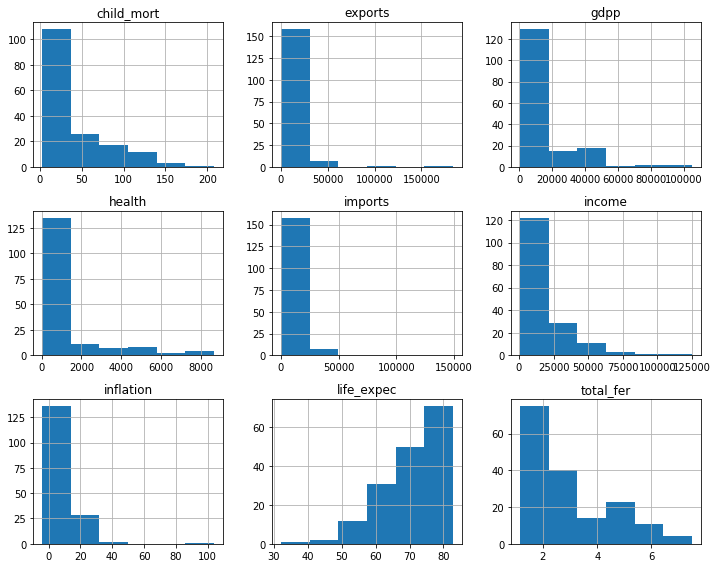

In [3331]:
# Visulaise the data distribution using histogram
country_data[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']].hist(figsize=(10,8),bins=6)
plt.tight_layout()
plt.show()

data is mostly left skewed expect for life_expec

Text(0.5, 1.0, 'Correlation between different fearures')

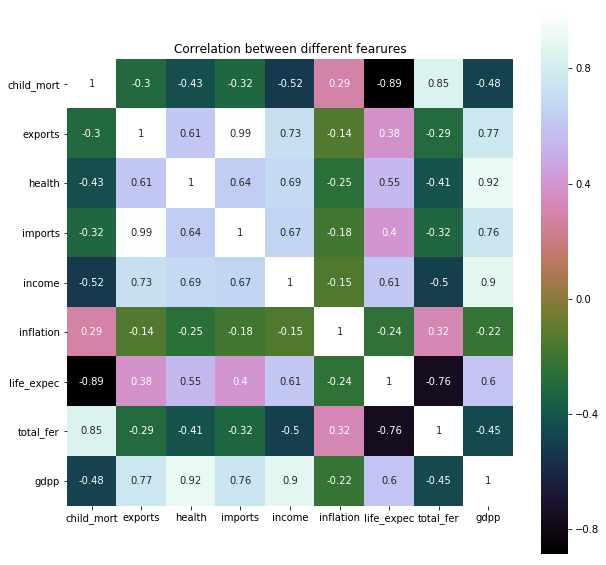

In [3332]:
# Correlation between the variables
correlation = country_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

In [3333]:
correlation_0 = country_data.corr().abs()
correlation_0 = correlation_0.unstack().sort_values(kind="quicksort")
correlation_0 = correlation_0.dropna()
correlation_0 = correlation_0[correlation_0 != 1.0]
corr = correlation_0[correlation_0 > 0.70]
print(round(corr,2))

exports     income        0.73
income      exports       0.73
imports     gdpp          0.76
gdpp        imports       0.76
total_fer   life_expec    0.76
life_expec  total_fer     0.76
gdpp        exports       0.77
exports     gdpp          0.77
total_fer   child_mort    0.85
child_mort  total_fer     0.85
life_expec  child_mort    0.89
child_mort  life_expec    0.89
gdpp        income        0.90
income      gdpp          0.90
health      gdpp          0.92
gdpp        health        0.92
exports     imports       0.99
imports     exports       0.99
dtype: float64


Top correlations found as:
imports     exports       0.99
gdpp        health        0.92
income      gdpp          0.90
life_expec  child_mort    0.89
income      gdpp          0.90

There is correlation but as going to use PCA so it will handle.

In [3334]:
country_data[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)

,country,child_mort
66,Haiti,208.0
132,Sierra Leone,160.0
32,Chad,150.0
31,Central African Republic,149.0
97,Mali,137.0
113,Nigeria,130.0
112,Niger,123.0
3,Angola,119.0
25,Burkina Faso,116.0
37,"Congo, Dem. Rep.",116.0


In [3335]:
#bar plot to check effective socio-economic factors for top and bottom for 10 countries

def barplot(col,sort):
    fig = plt.figure(figsize=(10,4))
    col_filter = country_data[['country',col]].sort_values(col, ascending = sort).head(10)
    sns.barplot(x='country', y=col, data=col_filter)
    plt.xticks(rotation = 45)

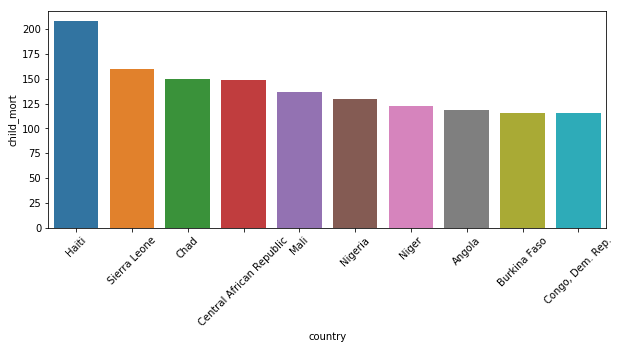

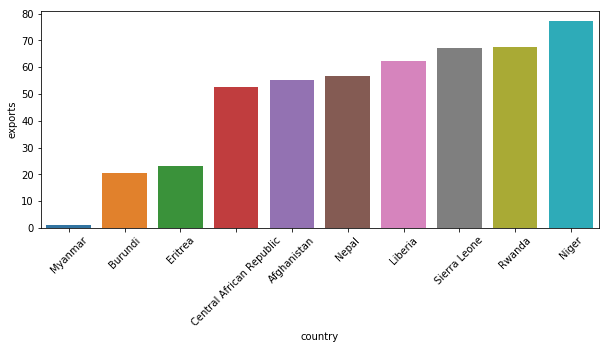

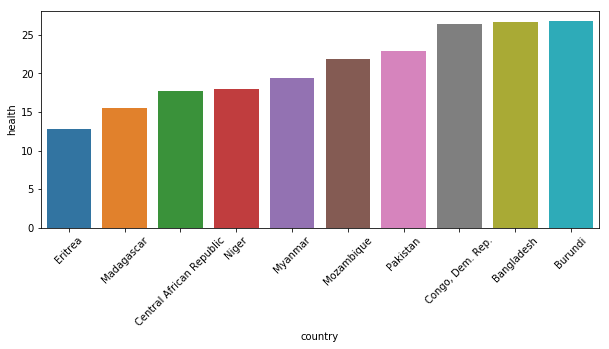

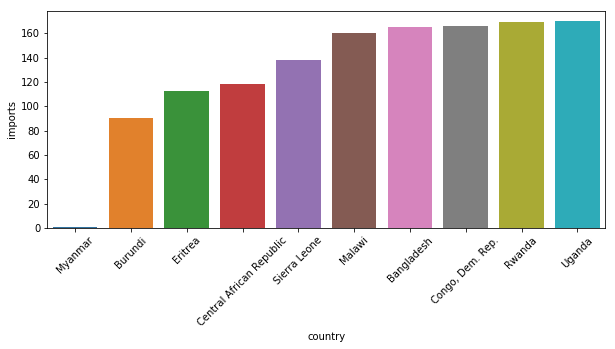

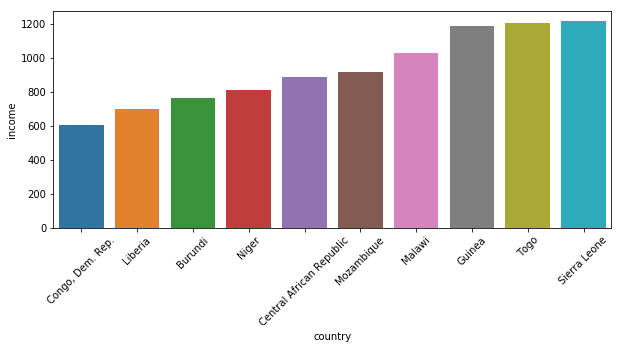

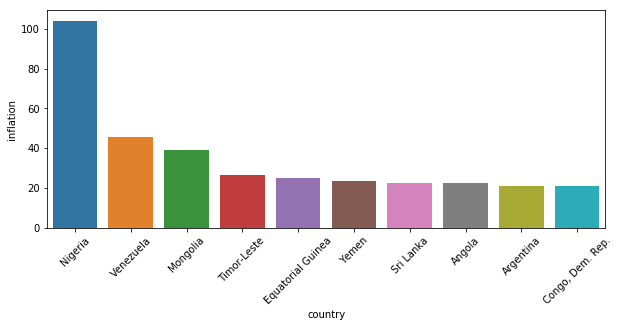

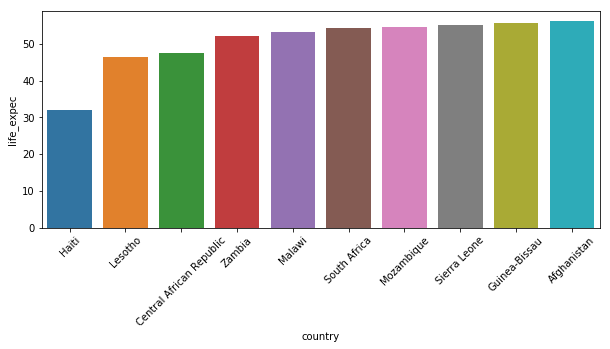

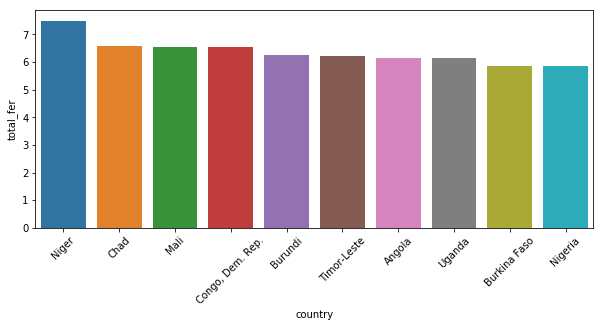

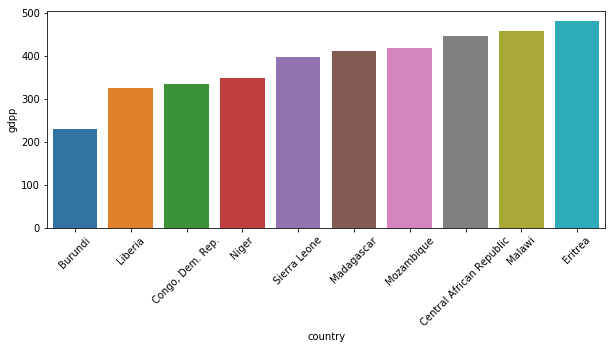

In [3336]:
barplot('child_mort',False)
#check bottom 10 exports country
barplot('exports',True)
#check bottom 10 health for country
barplot('health',True)
#check bottom 10 imports for country
barplot('imports',True)
#check bottom 10 income for country
barplot('income',True)
barplot('inflation',False)
#check bottom 10 life_expe for country
barplot('life_expec',True)
barplot('total_fer',False)
#check bottom 10 gdpp for country
barplot('gdpp',True)

Conclusion from above for countries:
1. Child Mort - Death of children under 5 years of age per 1000 live births
Top 10 countries are : Haiti,Sierra Leone,Chad,Central African Republic	,Mali,Nigeria,Niger,Angola,Burkina Faso,Congo.Dem. Rep.
2. exports - 
Bottom 10 countries are : Myanmar,Timor,Eritrea,Burundi,Nepal,Afghanishtan,Brazil,Central African Republic,Rwanda,Tonga	
3. Health - Total health spending as %age of Total GDP
Bottom 10 countries are : Qatar,Myanmar,Pakistan,Congo. Rep.,Turkmenistan,Indonesia,Kuwait,Eritrea,Oman,Brunei
4. Import -
Bottom 10 countries are : Myanmar,Brazil,Japan,US,Argentina,Sudan,Nigeria,Venezuela,Colombia,Gabon
5. Income -
Bottom 10 countries are : Congo.Dem.Rep., Liberia, Burundi,Niger,Cntral African,Mozambiqiue,Malawi,Guinea,Togo,Sierra Leone
6. Gdpp -
Bottom 10 countries are : Burundi, Liberia, Burundi,Congo.Dem.Rep.,Niger,Sierra Leone,Madagascar,Mozambiqiue,Cntral African,Malawi,Eritrea

The important factore for Child Mort,Gdpp,Income the common countries are
Congo.Dem.Rep.,Niger,Sierra Leone,

### Outlier Analysis

In [3337]:
# Visualise using boxplot

In [3338]:
def boxplot(col):
    fig = plt.figure(figsize=(10,4))
    sns.boxplot(data=country_data[col])
    plt.title(col)
    plt.tight_layout()

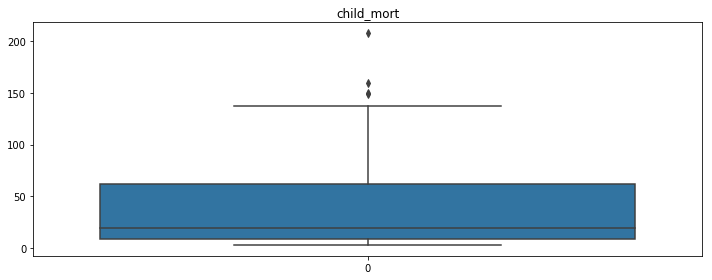

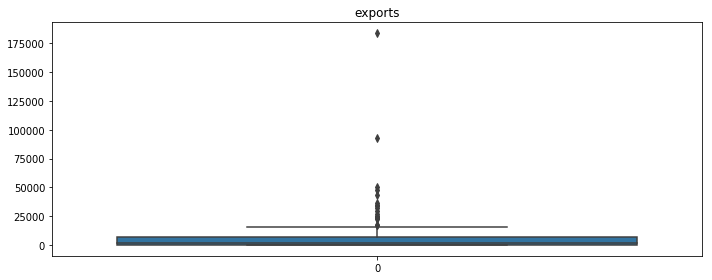

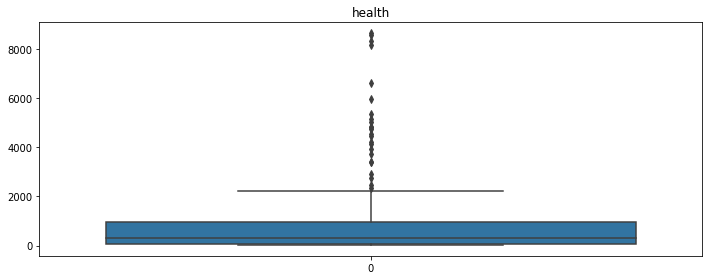

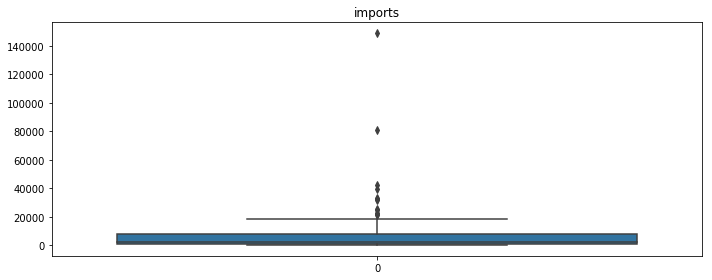

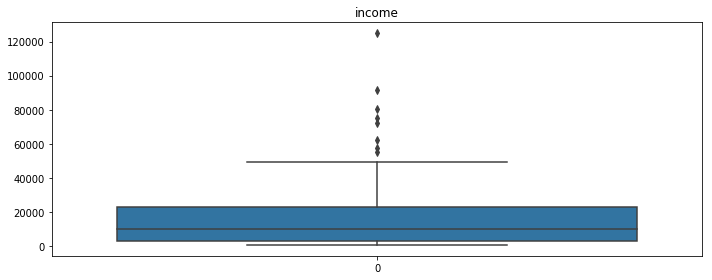

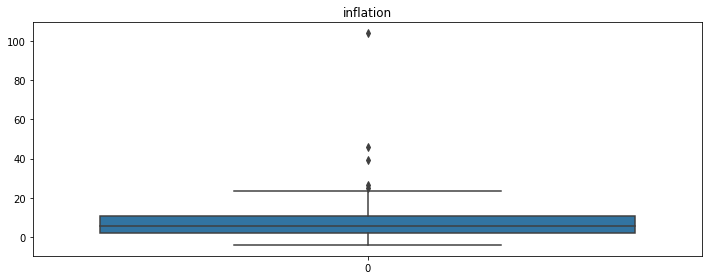

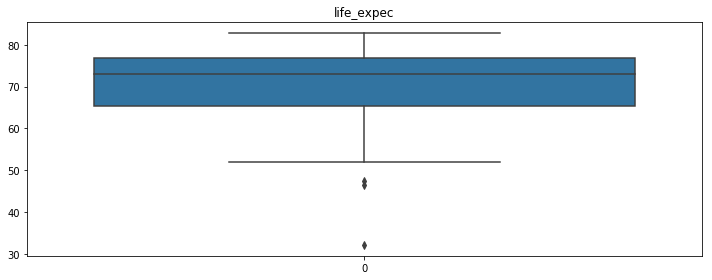

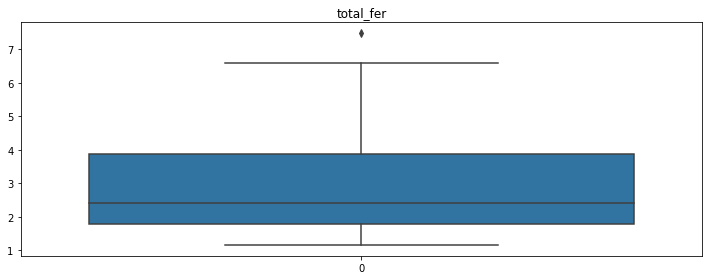

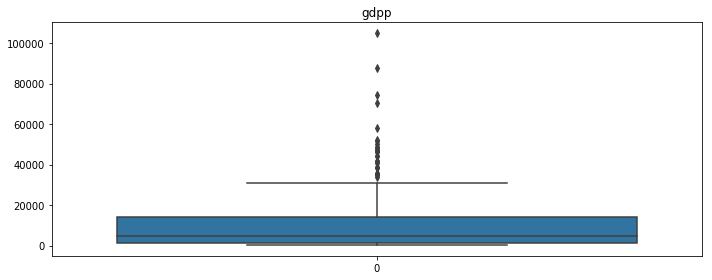

In [3339]:
boxplot('child_mort')
boxplot('exports')
boxplot('health')
boxplot('imports')
boxplot('income')
boxplot('inflation')
boxplot('life_expec')
boxplot('total_fer')
boxplot('gdpp')

In [3340]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [3341]:
#rows before removing outliers
country_data.shape

(167, 10)

In [3342]:
# There are outliers in boxplot and also in the distribution can be seen on child_mort,imports,income,gdpp
# Lets treat the outliers based on socio-economic factors only for backward countries so 0.05 to 0.95

low =0.05
high =0.95
def removeOutliers(col):
    quant_df = country_data[col].quantile([low, high]).values
    country_data[col][country_data[col] <= quant_df[0]] = quant_df[0]
    country_data[col][country_data[col] >= quant_df[1]] = quant_df[1]

removeOutliers('child_mort')
removeOutliers('exports')
removeOutliers('health')
removeOutliers('imports')
removeOutliers('income')
removeOutliers('inflation')
removeOutliers('life_expec')
removeOutliers('total_fer')
removeOutliers('gdpp')


In [3343]:
#rows after removing outliers
country_data.shape

(167, 10)

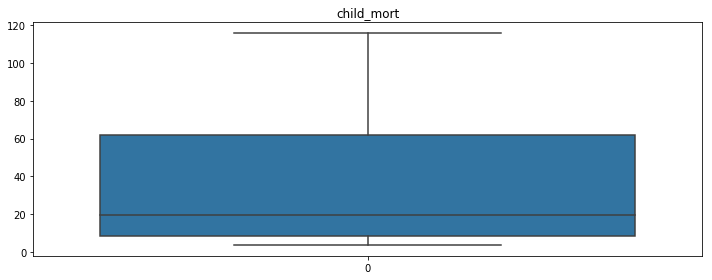

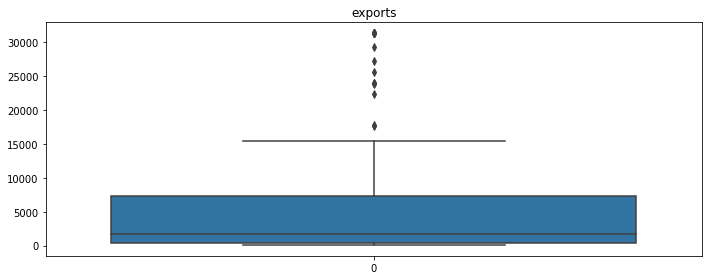

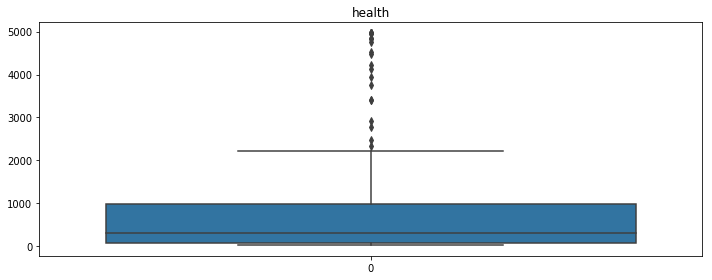

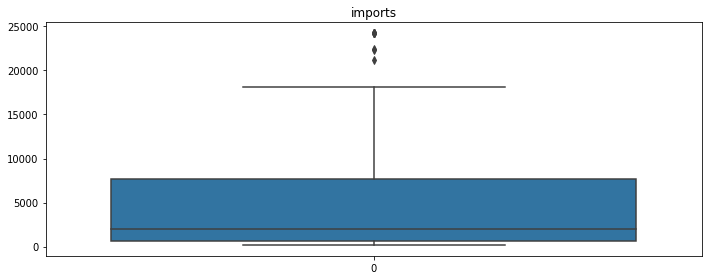

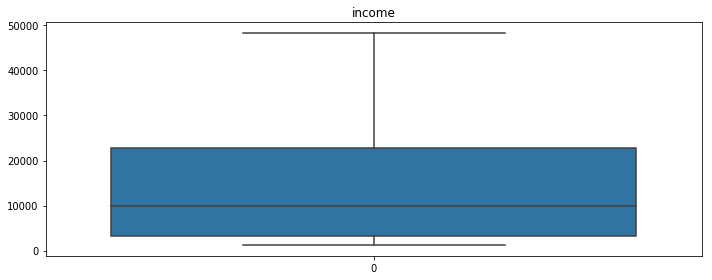

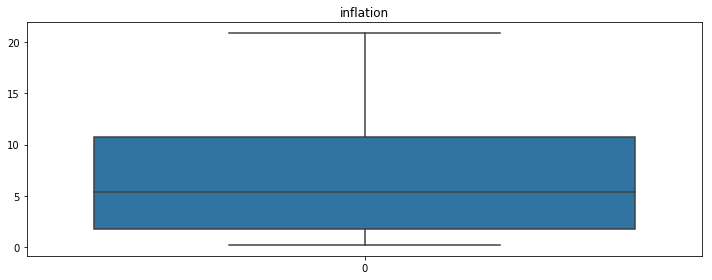

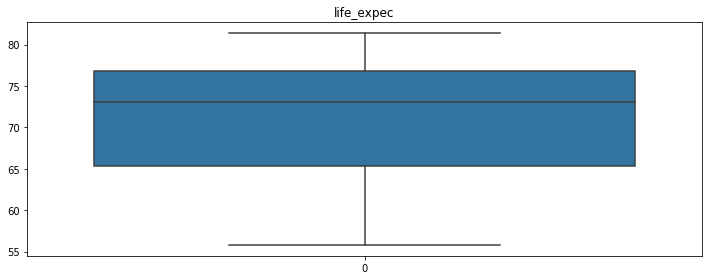

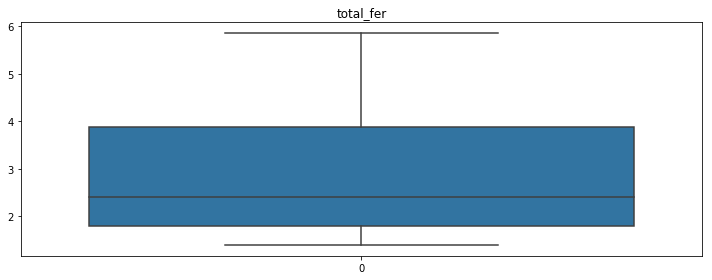

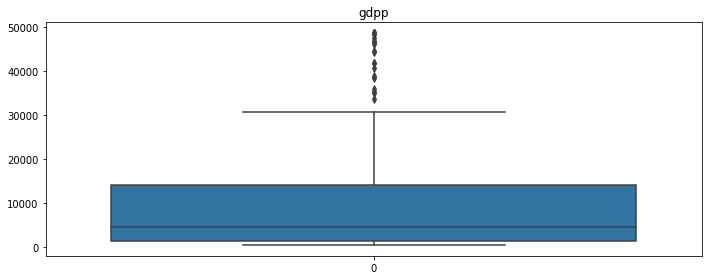

In [3344]:
#Plot the data again and verify outliers removed

boxplot('child_mort')
boxplot('exports')
boxplot('health')
boxplot('imports')
boxplot('income')
boxplot('inflation')
boxplot('life_expec')
boxplot('total_fer')
boxplot('gdpp')

### Scaling the data before PCM

In [3345]:
import copy
# save the copy into data before scaling
data = copy.deepcopy(country_data)
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,70.4688,41.9174,248.297,1610.0,9.44,56.2,5.820,553.0
1,Albania,16.6,1145.2000,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090.0
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460.0
3,Angola,116.0,2199.1900,100.6050,1514.370,5900.0,20.87,60.1,5.861,3530.0
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200.0


In [3346]:
# Data Normalization
from sklearn.preprocessing import StandardScaler

#copy the dataframe
country_data_cp = country_data

cols =['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

country_data_cp[cols] = StandardScaler().fit_transform(country_data_cp[cols])

In [3347]:
country_data_cp[cols].head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.479588,-0.668039,-0.629778,-0.733291,-0.960575,0.387667,-1.825310,2.020718,-0.757874
1,-0.560024,-0.542389,-0.473807,-0.472674,-0.395590,-0.404004,0.682454,-0.887331,-0.523775
2,-0.263504,-0.476048,-0.530344,-0.560668,-0.193907,1.452825,0.707406,-0.022587,-0.499286
3,2.194560,-0.419165,-0.589272,-0.543598,-0.669255,2.215708,-1.338729,2.049310,-0.560839
4,-0.734610,-0.027297,-0.150953,0.306143,0.227115,-0.891802,0.744836,-0.552591,0.012991


### Apply PCM

In [3348]:
#Improting the PCA module
pca = PCA(svd_solver='randomized', random_state=42)

In [3349]:
# Putting feature variable to X
X = country_data_cp.drop(['country'],axis=1)

# Putting response variable to y
y = country_data_cp['country']

In [3350]:
#Doing the PCA on the train data
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

#### Let's plot the principal components and try to make sense of them
- We'll plot original features on the first 2 principal components as axes

In [3351]:
pca.components_

array([[-0.31370269,  0.3507987 ,  0.35117815,  0.36823124,  0.37600029,
        -0.17399218,  0.34308686, -0.29811056,  0.37600871],
       [ 0.48684113,  0.33097569,  0.24315695,  0.26930019,  0.16807187,
         0.20045729, -0.34450382,  0.51847097,  0.25664488],
       [-0.17763592,  0.06865384, -0.13607851, -0.04200452,  0.17010197,
         0.93794124,  0.15426058, -0.10473969, -0.00389912],
       [ 0.02276945, -0.53686278,  0.64515576, -0.38273615,  0.01264167,
         0.10608158,  0.18223721,  0.15311285,  0.28368985],
       [ 0.12839534, -0.08487856,  0.20033804, -0.04421243,  0.07457851,
         0.07932579, -0.67371553, -0.67970463,  0.08046529],
       [ 0.1076401 , -0.12068475, -0.4231057 , -0.38460027,  0.74879481,
        -0.17145666, -0.03640109,  0.06088361,  0.22757439],
       [-0.77529381, -0.03982588,  0.0371735 ,  0.00485008,  0.05733254,
        -0.02440683, -0.50118517,  0.37360537,  0.03574582],
       [-0.05482803,  0.44271452, -0.15457504, -0.49759106, -0

In [3352]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.313703,0.486841,child_mort
1,0.350799,0.330976,exports
2,0.351178,0.243157,health
3,0.368231,0.269300,imports
4,0.376000,0.168072,income


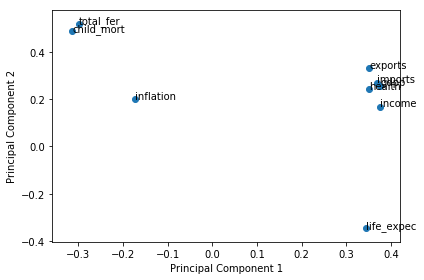

In [3353]:
%matplotlib inline
fig = plt.figure(figsize = (6,4))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

### 3 cluster can be seen as import,export,health,income - total_fer,child_mort,inflation and life_Expec

Plot the same with some colors

In [3354]:
import matplotlib.colors as pltc
all_colors = [k for k,v in pltc.cnames.items()]

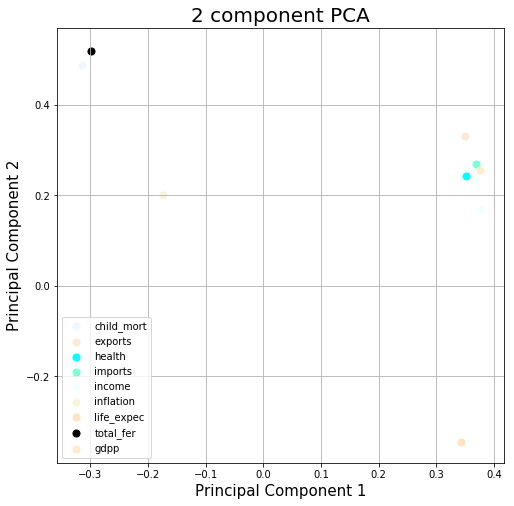

In [3355]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
colors = all_colors
for i, color in zip(pcs_df.Feature,colors):
    indicesToKeep = pcs_df['Feature'] == i
    ax.scatter(pcs_df.loc[indicesToKeep, 'PC1']
               , pcs_df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(pcs_df['Feature'])
ax.grid()

#### Looking at the screeplot to assess the number of needed principal components

In [3356]:
pca.explained_variance_ratio_

array([0.68508868, 0.14727819, 0.09507098, 0.03147493, 0.01636993,
       0.0119143 , 0.00890517, 0.00252245, 0.00137538])

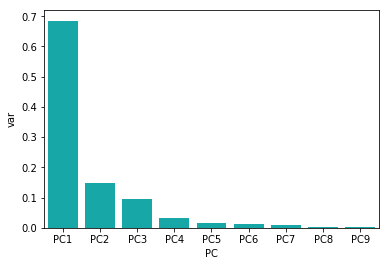

In [3357]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']})
sns.barplot(x='PC',y="var", 
           data=df, color="c");

First PC1 component explained the maximum variance

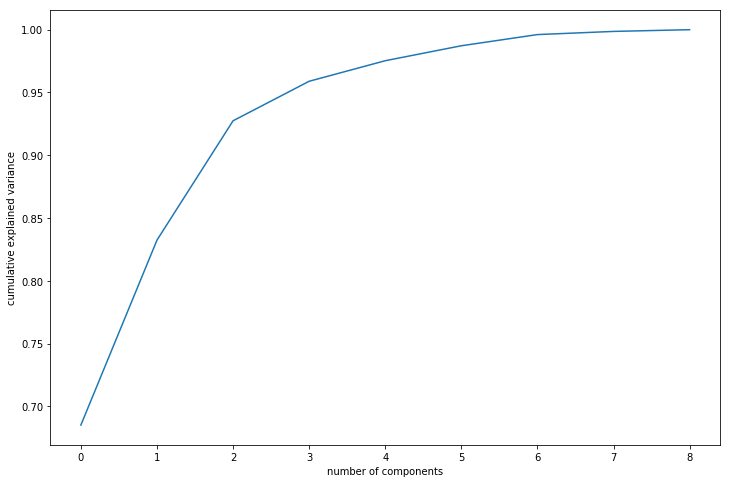

In [3358]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like 4 components are enough to describe 95% of the variance in the dataset
- We'll choose 4 components for our modeling

In [3359]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

#### Basis transformation - getting the data onto our PCs

In [3360]:
df_train_pca = pca_final.fit_transform(X)
df_train_pca.shape

(167, 4)

In [3361]:
df_pca = pd.DataFrame(df_train_pca)
df_pca.head()

,0,1,2,3
0,-3.131872,1.546674,-0.481267,0.055881
1,-0.131785,-1.671799,-0.100328,-0.049290
2,-0.741069,-0.691548,1.551504,0.272454
3,-3.160909,2.351136,1.228481,0.249862
4,0.946293,-1.001889,-0.489047,-0.249619


#### Creating correlation matrix for the principal components - we expect little to no correlation

In [3362]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())

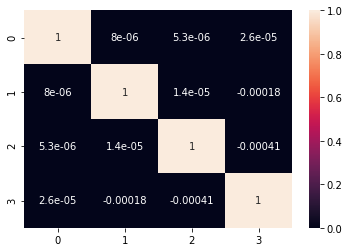

In [3363]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (6,4))
sns.heatmap(corrmat,annot = True)

In [3364]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 2.5690580350260622e-05 , min corr:  -0.00040989887469666347


#### Indeed - there is no correlation between any two components! Good job, PCA!
- We effectively have removed multicollinearity from our situation, and our models will be much more stable

### Perform Hopkins Statistics

Cluster tendency can be stated as below:

If the value is between {0.01, ...,0.3}, the data is regularly spaced.

If the value is around 0.5, it is random.

If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [3365]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [3366]:
hopkins(df_pca)

0.812651149841708

Approx 0.82 so it shows high tendency to cluster

### Perform K-means Clustering

In [3264]:
#import libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# k-means with some arbitrary k
df_pca_cp = df_pca
kmeans = KMeans(n_clusters=4, max_iter=50,random_state=42)
kmeans.fit(df_pca_cp)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [3265]:
kmeans.labels_

array([2, 0, 0, 2, 3, 0, 0, 1, 1, 0, 3, 3, 0, 3, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 3, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 3, 3, 3,
       1, 0, 0, 0, 0, 2, 2, 3, 0, 1, 1, 2, 2, 0, 1, 2, 3, 0, 0, 2, 2, 0,
       2, 3, 1, 0, 0, 0, 2, 1, 3, 3, 0, 3, 0, 0, 2, 2, 1, 0, 2, 3, 0, 2,
       2, 0, 3, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 3, 2, 2, 1, 3, 2, 0, 0, 0, 0, 3, 3, 1, 0, 0, 2, 0, 3, 2, 0, 3,
       2, 1, 3, 3, 2, 2, 3, 3, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

## Finding the Optimal Number of Clusters

### SSD

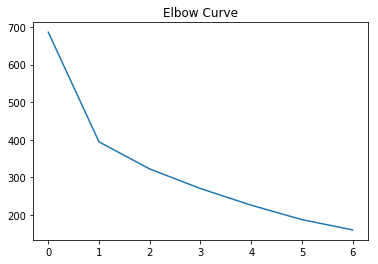

In [3266]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state=42)
    kmeans.fit(df_pca_cp)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.title('Elbow Curve')
plt.plot(ssd)

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [3267]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state=42)
    kmeans.fit(df_pca_cp)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_pca_cp, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5058325310521449
For n_clusters=3, the silhouette score is 0.4504499169269988
For n_clusters=4, the silhouette score is 0.393598724512951
For n_clusters=5, the silhouette score is 0.3815429419949918
For n_clusters=6, the silhouette score is 0.37043405438357774
For n_clusters=7, the silhouette score is 0.3776524667585442
For n_clusters=8, the silhouette score is 0.3868389430546452


As Elbow curve and Sihouette analysis giving vaule 2 but we go with value 3 as using 2 the list of backward countries increased as we need to found only few countries so lets go with more precise distribution

In [3268]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50,random_state=42)
kmeans.fit(df_pca_cp)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [3269]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [3270]:
k_cluster = pd.Series(kmeans.labels_.reshape(-1,))
df_pca_km = pd.concat([df_pca_cp, k_cluster], axis=1)
df_pca_km.columns = ["PC1_k","PC2_k","PC3_k","PC4_k","cluster_id_kmeans"]
df_pca_km.head()

,PC1_k,PC2_k,PC3_k,PC4_k,cluster_id_kmeans
0,-3.131872,1.546674,-0.481267,0.055881,2
1,-0.131785,-1.671799,-0.100328,-0.049290,0
2,-0.741069,-0.691548,1.551504,0.272454,0
3,-3.160909,2.351136,1.228481,0.249862,2
4,0.946293,-1.001889,-0.489047,-0.249619,0


In [3271]:
df_pca_km

,PC1_k,PC2_k,PC3_k,PC4_k,cluster_id_kmeans
0,-3.131872,1.546674,-0.481267,0.055881,2
1,-0.131785,-1.671799,-0.100328,-0.049290,0
2,-0.741069,-0.691548,1.551504,0.272454,0
3,-3.160909,2.351136,1.228481,0.249862,2
4,0.946293,-1.001889,-0.489047,-0.249619,0
5,-0.210514,-0.575144,2.360969,0.634833,0
6,-0.556177,-1.515116,0.298101,-0.073330,0
7,4.031534,0.486452,-0.491342,1.689436,1
8,5.420098,1.397140,-0.499150,0.276150,1
9,-0.694705,-0.501497,1.112395,-0.047612,0


In [3272]:
df_pca_km['cluster_id_kmeans'].value_counts()

0    81
2    49
1    37
Name: cluster_id_kmeans, dtype: int64

#### Plot scatter to visualise the clusters

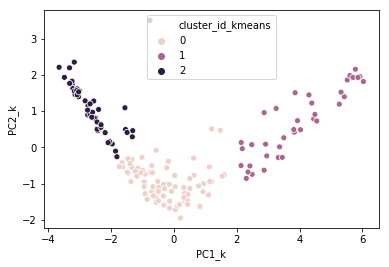

In [3273]:
sns.scatterplot(x='PC1_k',y='PC2_k',hue='cluster_id_kmeans',legend='full',data=df_pca_km)

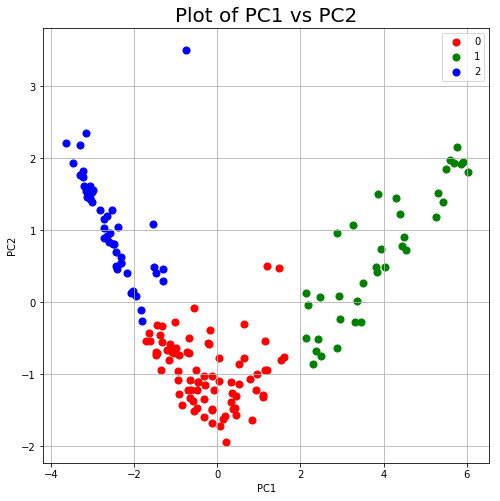

In [3274]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.set_title('Plot of PC1 vs PC2', fontsize = 20)

targets = [0,1,2]
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = df_pca_km['cluster_id_kmeans'] == target
    ax.scatter(df_pca_km.loc[indicesToKeep, 'PC1_k']
               , df_pca_km.loc[indicesToKeep, 'PC2_k']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()

In [3275]:
# assign the label to scaled dataset
country_data_cp['cluster_id_kmeans'] = kmeans.labels_
country_data_cp['PC1_k'] = df_pca_km['PC1_k']
country_data_cp['PC2_k'] = df_pca_km['PC2_k']
country_data_cp.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_kmeans,PC1_k,PC2_k
0,Afghanistan,1.479588,-0.668039,-0.629778,-0.733291,-0.960575,0.387667,-1.825310,2.020718,-0.757874,2,-3.131872,1.546674
1,Albania,-0.560024,-0.542389,-0.473807,-0.472674,-0.395590,-0.404004,0.682454,-0.887331,-0.523775,0,-0.131785,-1.671799
2,Algeria,-0.263504,-0.476048,-0.530344,-0.560668,-0.193907,1.452825,0.707406,-0.022587,-0.499286,0,-0.741069,-0.691548
3,Angola,2.194560,-0.419165,-0.589272,-0.543598,-0.669255,2.215708,-1.338729,2.049310,-0.560839,2,-3.160909,2.351136
4,Antigua and Barbuda,-0.734610,-0.027297,-0.150953,0.306143,0.227115,-0.891802,0.744836,-0.552591,0.012991,0,0.946293,-1.001889


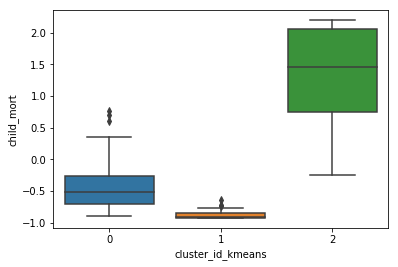

In [3276]:
# plot
sns.boxplot(x='cluster_id_kmeans', y='child_mort', data=country_data_cp)

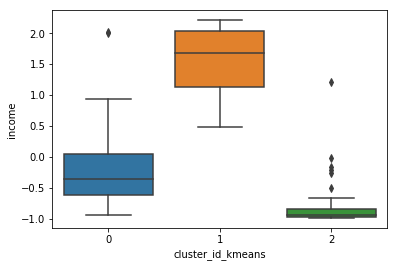

In [3277]:
sns.boxplot(x='cluster_id_kmeans', y='income', data=country_data_cp)

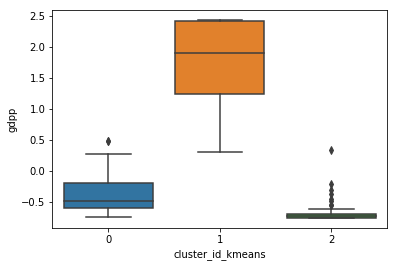

In [3278]:
sns.boxplot(x='cluster_id_kmeans', y='gdpp', data=country_data_cp)

### Hierarchical Clustering

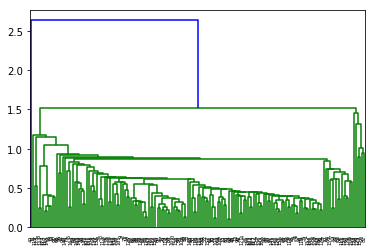

In [3279]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# single linkage
mergings = linkage(df_pca_cp, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

It does not make sense so lets implement complete linkage

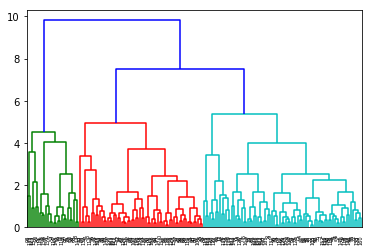

In [3280]:
# complete linkage
mergings = linkage(df_pca_cp, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [3281]:
# Dendogram cutting at 2 clusters seems optimum
cluster_labels = cut_tree(mergings, n_clusters=2).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [3282]:
cut_cluster = pd.Series(cut_tree(mergings, n_clusters = 2).reshape(-1,))
df_pca_hc = pd.concat([df_pca_cp, cut_cluster], axis=1)
df_pca_hc.columns = ["PC1_hc","PC2_hc","PC3_hc","PC4_hc","cluster_id_hierarchical"]
df_pca_hc.head()

,PC1_hc,PC2_hc,PC3_hc,PC4_hc,cluster_id_hierarchical
0,-3.131872,1.546674,-0.481267,0.055881,0
1,-0.131785,-1.671799,-0.100328,-0.049290,0
2,-0.741069,-0.691548,1.551504,0.272454,0
3,-3.160909,2.351136,1.228481,0.249862,0
4,0.946293,-1.001889,-0.489047,-0.249619,0


In [3283]:
df_pca_hc

,PC1_hc,PC2_hc,PC3_hc,PC4_hc,cluster_id_hierarchical
0,-3.131872,1.546674,-0.481267,0.055881,0
1,-0.131785,-1.671799,-0.100328,-0.049290,0
2,-0.741069,-0.691548,1.551504,0.272454,0
3,-3.160909,2.351136,1.228481,0.249862,0
4,0.946293,-1.001889,-0.489047,-0.249619,0
5,-0.210514,-0.575144,2.360969,0.634833,0
6,-0.556177,-1.515116,0.298101,-0.073330,0
7,4.031534,0.486452,-0.491342,1.689436,1
8,5.420098,1.397140,-0.499150,0.276150,1
9,-0.694705,-0.501497,1.112395,-0.047612,0


#### Plot scatter to visualise the clusters

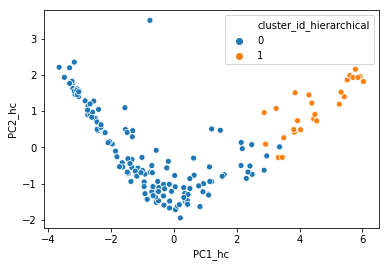

In [3284]:
sns.scatterplot(x='PC1_hc',y='PC2_hc',hue='cluster_id_hierarchical',legend='full',data=df_pca_hc)

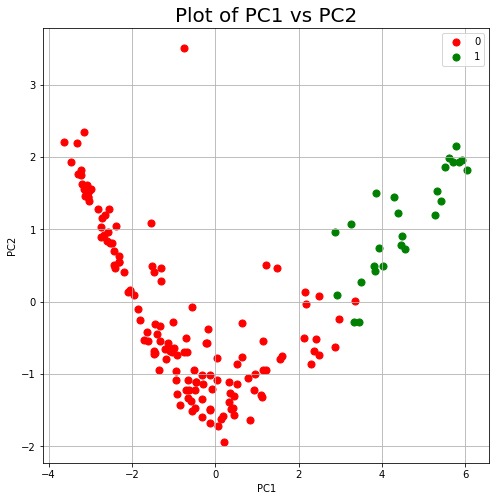

In [3285]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.set_title('Plot of PC1 vs PC2', fontsize = 20)

targets = [0,1]
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = df_pca_hc['cluster_id_hierarchical'] == target
    ax.scatter(df_pca_hc.loc[indicesToKeep, 'PC1_hc']
               , df_pca_hc.loc[indicesToKeep, 'PC2_hc']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()

In [3286]:
# assign cluster labels to scaled dataset
country_data_cp['cluster_id_hierarchical'] = cluster_labels
country_data_cp['PC1_hc'] = df_pca_hc['PC1_hc']
country_data_cp['PC2_hc'] = df_pca_hc['PC2_hc']
country_data_cp.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_kmeans,PC1_k,PC2_k,cluster_id_hierarchical,PC1_hc,PC2_hc
0,Afghanistan,1.479588,-0.668039,-0.629778,-0.733291,-0.960575,0.387667,-1.825310,2.020718,-0.757874,2,-3.131872,1.546674,0,-3.131872,1.546674
1,Albania,-0.560024,-0.542389,-0.473807,-0.472674,-0.395590,-0.404004,0.682454,-0.887331,-0.523775,0,-0.131785,-1.671799,0,-0.131785,-1.671799
2,Algeria,-0.263504,-0.476048,-0.530344,-0.560668,-0.193907,1.452825,0.707406,-0.022587,-0.499286,0,-0.741069,-0.691548,0,-0.741069,-0.691548
3,Angola,2.194560,-0.419165,-0.589272,-0.543598,-0.669255,2.215708,-1.338729,2.049310,-0.560839,2,-3.160909,2.351136,0,-3.160909,2.351136
4,Antigua and Barbuda,-0.734610,-0.027297,-0.150953,0.306143,0.227115,-0.891802,0.744836,-0.552591,0.012991,0,0.946293,-1.001889,0,0.946293,-1.001889


#### As above data is scaled one lets merge it to real data

In [3287]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,70.4688,41.9174,248.297,1610.0,9.44,56.2,5.820,553.0
1,Albania,16.6,1145.2000,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090.0
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460.0
3,Angola,116.0,2199.1900,100.6050,1514.370,5900.0,20.87,60.1,5.861,3530.0
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200.0


In [3288]:
clustered_data = data.merge(country_data_cp[['country','cluster_id_hierarchical','cluster_id_kmeans']], on = 'country')
clustered_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_hierarchical,cluster_id_kmeans
0,Afghanistan,90.2,70.4688,41.9174,248.297,1610.0,9.44,56.2,5.820,553.0,0,2
1,Albania,16.6,1145.2000,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090.0,0,0
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460.0,0,0
3,Angola,116.0,2199.1900,100.6050,1514.370,5900.0,20.87,60.1,5.861,3530.0,0,2
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200.0,0,0


In [3289]:
#Lets consider 3 variables for comparision gdpp,child_mort,income
clustered_data_filter = clustered_data[['country','child_mort','income','gdpp','cluster_id_hierarchical','cluster_id_kmeans']]

In [3290]:
clustered_data_filter.head()

,country,child_mort,income,gdpp,cluster_id_hierarchical,cluster_id_kmeans
0,Afghanistan,90.2,1610.0,553.0,0,2
1,Albania,16.6,9930.0,4090.0,0,0
2,Algeria,27.3,12900.0,4460.0,0,0
3,Angola,116.0,5900.0,3530.0,0,2
4,Antigua and Barbuda,10.3,19100.0,12200.0,0,0


#check the distrbution of data to clusters

In [3291]:
clustered_data_filter["cluster_id_kmeans"].value_counts()

0    81
2    49
1    37
Name: cluster_id_kmeans, dtype: int64

In [3292]:
clustered_data_filter["cluster_id_hierarchical"].value_counts()

0    141
1     26
Name: cluster_id_hierarchical, dtype: int64

As most countries in hierarchical belongs to 0 cluster so will choose k-means as data is more precise between 3 clusters.

### Analysis of the clusters

Lets consider only 3 important columns - gdpp,income and child_mort as specified in business problem

In [3293]:
# calculate the mean
child_mort_k = pd.DataFrame(clustered_data_filter.groupby(["cluster_id_kmeans"]).child_mort.mean())
income_k = pd.DataFrame(clustered_data_filter.groupby(["cluster_id_kmeans"]).income.mean())
gdpp_k = pd.DataFrame(clustered_data_filter.groupby(["cluster_id_kmeans"]).gdpp.mean())


More than 80% data is in cluster 0 for hierarchical so not an good idea to consider this therefore will go with k-means cluster

In [3294]:
df = pd.concat([pd.Series(list(range(0,3))), child_mort_k,child_mort_h, income_k, income_h,
               gdpp_k, gdpp_h], axis=1)
df.columns = ["cluster_id","child_mort_kmean","child_mort_hmean","income_kmean","income_hmean", "gdpp_kmean","gdpp_hmean"]
df

,cluster_id,child_mort_kmean,child_mort_hmean,income_kmean,income_hmean,gdpp_kmean,gdpp_hmean
0,0,21.575309,45.763846,12430.617284,9221.976923,6355.975309,4677.162308
1,1,5.344324,5.344324,38711.081081,38711.081081,37745.675676,37745.675676
2,2,85.748980,NaN,3917.897959,NaN,1901.981633,NaN


For k-mean cluster 0 contains the list of most backward countries.
Visualise more on the same.

Visualise for both k-mean and hierachical using pyplot

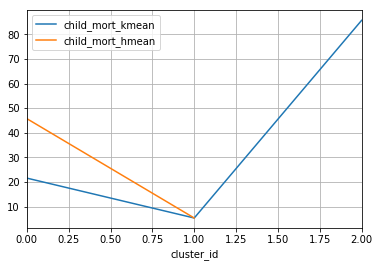

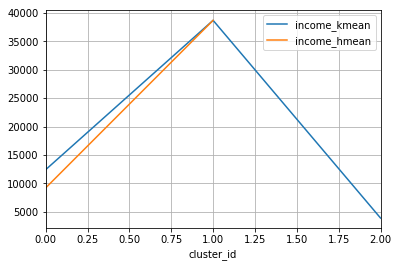

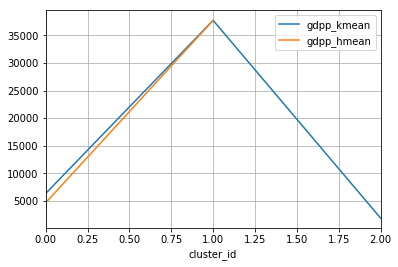

In [3295]:
df.plot(x='cluster_id', y=['child_mort_kmean', 'child_mort_hmean'], figsize=(6,4), grid=True)
df.plot(x='cluster_id', y=['income_kmean', 'income_hmean'], figsize=(6,4), grid=True)
df.plot(x='cluster_id', y=['gdpp_kmean', 'gdpp_hmean'], figsize=(6,4), grid=True)

Visualise for both k-mean and hierachical using barplot

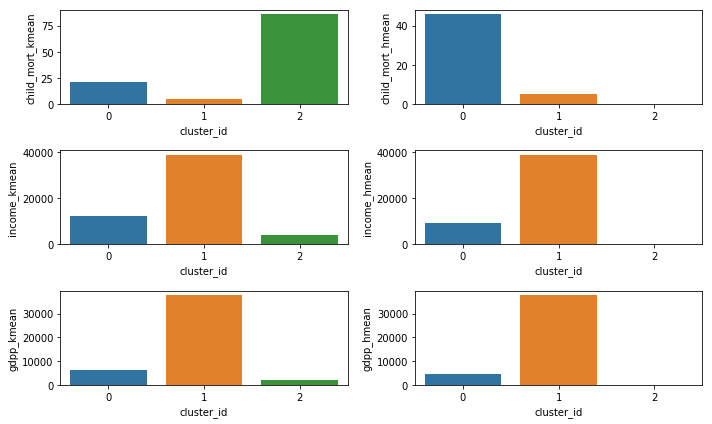

In [3296]:
fig, axs = plt.subplots(3,2,figsize = (10,6))

sns.barplot(x=df.cluster_id, y=df.child_mort_kmean, ax = axs[0,0])
sns.barplot(x=df.cluster_id, y=df.child_mort_hmean, ax = axs[0,1])
sns.barplot(x=df.cluster_id, y=df.income_kmean, ax = axs[1,0])
sns.barplot(x=df.cluster_id, y=df.income_hmean, ax = axs[1,1])
sns.barplot(x=df.cluster_id, y=df.gdpp_kmean, ax = axs[2,0])
sns.barplot(x=df.cluster_id, y=df.gdpp_hmean, ax = axs[2,1])
plt.tight_layout()

Confirm that cluster 0 of k-means contains the list of most backward countries

In [3297]:
clustered_data[clustered_data.cluster_id_kmeans == 2].country.values

array(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati',
       'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria',
       'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands',
       'South Africa', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste',
       'Togo', 'Uganda', 'Yemen', 'Zambia'], dtype=object)

In [3298]:
clustered_data[clustered_data.cluster_id_hierarchical == 0].country.values

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana',
       'Haiti', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel',
       'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati',
       'Kyrgyz Republic', 'Lao', 'Latvia', 'Le

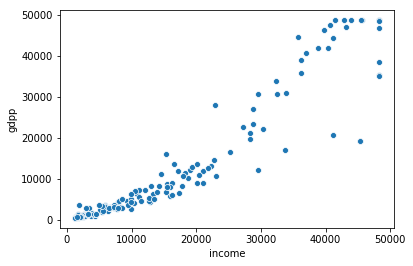

In [3299]:
sns.scatterplot(x='income',y='gdpp',data=clustered_data_filter)

In [3300]:
data.shape

(167, 10)

### Conclusion:
1. As number of countries are less in cluster 2 so good to analyse as data is distributed fairly for k-means so choose this one for clustering decision.
2. K-means cluster 0 contains the most backward countries as having high child_mor, low gdpp and low income
3. As cluster 2 represents the developing countries, Cluster 0 represent the underdeveloped and Cluster 1 represent developed countries so lets label cluster accordingly

### Analysis to found countries are in dire need of aid

Merge the actual data with cluster labels and components

In [3301]:
#Merge the cluster data with actual one
df_final = data.merge(country_data_cp[['country','PC1_k','PC2_k','cluster_id_kmeans']],on='country')
df_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1_k,PC2_k,cluster_id_kmeans
0,Afghanistan,90.2,70.4688,41.9174,248.297,1610.0,9.44,56.2,5.820,553.0,-3.131872,1.546674,2
1,Albania,16.6,1145.2000,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090.0,-0.131785,-1.671799,0
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460.0,-0.741069,-0.691548,0
3,Angola,116.0,2199.1900,100.6050,1514.370,5900.0,20.87,60.1,5.861,3530.0,-3.160909,2.351136,2
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200.0,0.946293,-1.001889,0


In [3302]:
df_final.shape

(167, 13)

In [3303]:
#create column label and assign cluster 0- Developed, cluster 1-Developing, cluster 2- UnderDeveloped
name = {2:"underdeveloped",0:"developing",1:"developed"}
df_final['label']=df_final['cluster_id_kmeans'].replace(name)
df_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1_k,PC2_k,cluster_id_kmeans,label
0,Afghanistan,90.2,70.4688,41.9174,248.297,1610.0,9.44,56.2,5.820,553.0,-3.131872,1.546674,2,underdeveloped
1,Albania,16.6,1145.2000,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090.0,-0.131785,-1.671799,0,developing
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460.0,-0.741069,-0.691548,0,developing
3,Angola,116.0,2199.1900,100.6050,1514.370,5900.0,20.87,60.1,5.861,3530.0,-3.160909,2.351136,2,underdeveloped
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200.0,0.946293,-1.001889,0,developing


### Analyse the cluster 2 only having list of countries

In [3304]:
#create dataframe having only income,gdpp and child_mort data
df_c = df_final[df_final.cluster_id_kmeans == 2]
df_c = df_c[['country','child_mort','income','gdpp']]
df_c.shape

(49, 4)

### Conclusion:
Found 49 underdeveloper or backward countries in cluster 2

### Analyse the components using visualisation

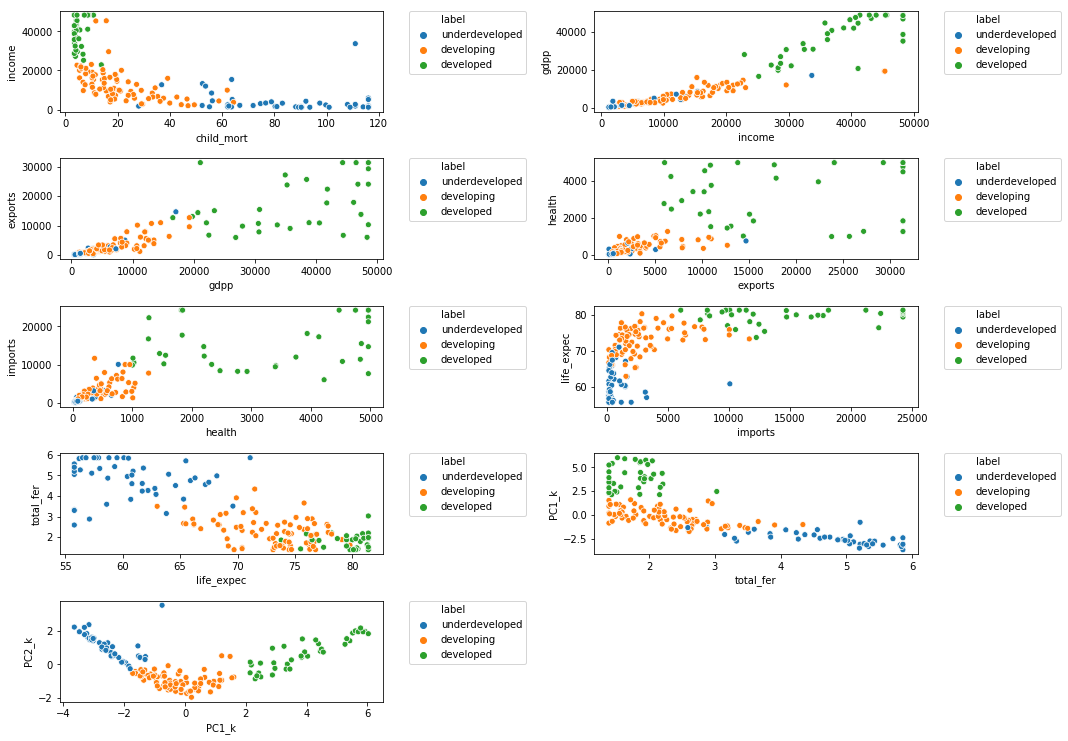

In [3305]:
#Plot the scatter plot to see underveloped countries cluster in components for 3 variables gdpp,income,child_mort
cols=['child_mort','income','gdpp','exports','health','imports','life_expec','total_fer','PC1_k','PC2_k']

fig = plt.figure(figsize = (15,12))

for i in range(9):
    plt.subplot(6,2,i+1)
    
    if i==3:
        ax=sns.scatterplot(x=cols[3],y=cols[4],hue='label',data=df_final)
        plt.legend(bbox_to_anchor=(1.08,1),loc=2,borderaxespad=0.)
    else:
        ax=sns.scatterplot(x=cols[i],y=cols[i+1],hue='label',data=df_final)
        plt.legend(bbox_to_anchor=(1.08,1),loc=2,borderaxespad=0.)
        
plt.tight_layout()
plt.show()

#### Inferences for Underdeveloped Cluster:
1. Child_mort is high but income is below 20000
2. gdpp and income is below 10000
3. exports and gdpp is below 10000
4. health is below 1000 and exports below 5000
5. imports below 5000
6. life_exp below 70
7. total_fer is high means increase in population
8. After Basic Transformation PC1 and PC2 values for Underdeveloped cluster coming in low value region.

Filter the countries for gdpp,income and child_mort and then retrieve the top 5 backward countries from all

## plot for 3 features - child_mort,income and gdpp

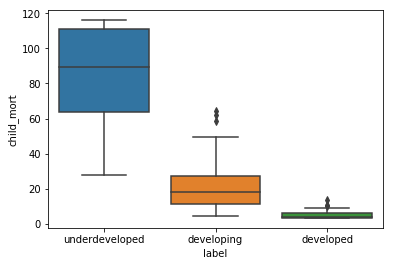

In [3306]:
sns.boxplot(x='label', y='child_mort', data=df_final)

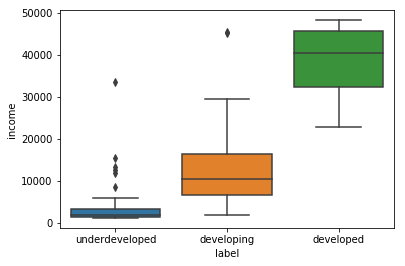

In [3307]:
sns.boxplot(x='label', y='income', data=df_final)

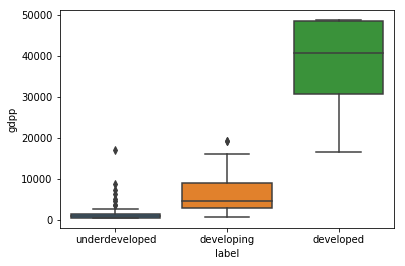

In [3308]:
sns.boxplot(x='label', y='gdpp', data=df_final)

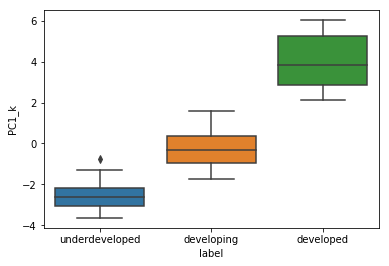

In [3309]:
sns.boxplot(x='label', y='PC1_k', data=df_final)

As gdpp and income is important for development so countries under label developed having high value and low for underdeveloped countries

In [3310]:
df_c.describe()

,child_mort,income,gdpp
count,49.000000,49.000000,49.000000
mean,85.748980,3917.897959,1901.981633
std,24.906418,5507.017539,2891.293413
min,28.100000,1213.000000,465.900000
25%,63.600000,1390.000000,553.000000
50%,89.300000,1870.000000,897.000000
75%,111.000000,3370.000000,1460.000000
max,116.000000,33700.000000,17100.000000


In [3311]:
# Retreive the country having income<=1300, gdpp<=550 and child mort>=100 i.e. less than 25% of values so got most 
# backward countries
country_final = df_c[df_c['income']<=1300]
country_final = country_final[country_final['gdpp']<=550]
country_final = country_final[country_final['child_mort']>=100]

country_final

,country,child_mort,income,gdpp
31,Central African Republic,116.0,1213.0,465.9
37,"Congo, Dem. Rep.",116.0,1213.0,465.9
106,Mozambique,101.0,1213.0,465.9
112,Niger,116.0,1213.0,465.9
132,Sierra Leone,116.0,1220.0,465.9


In [3312]:
country_final.shape

(5, 4)

### Conclusion:

1. As cluster 0 contains the underdeveloped countries so we have filter out only cluster 0 values
2. Bin the data on basis of values lesss then 25% for gdpp and income and more than 75% for child_mort
3. Top 5 countries need in direst need of aid are:
    1. Central African Republic
    2. Congo, Dem. Rep.	
    3. Mozambique
    4. Niger
    5. Sierra Leone
